The score for the Logistic Regression Model is: 0.9629629629629629
Confusion Matrix:
 [[13  0  0]
 [ 1 23  0]
 [ 0  1 16]]


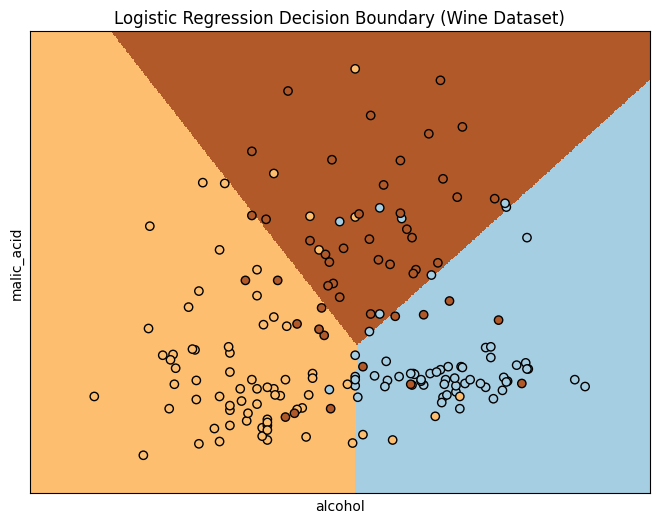

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the wine dataset
wine = datasets.load_wine()

# Features and target
X = wine.data
Y = wine.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

# Initialize and train Logistic Regression model
log_reg_model = linear_model.LogisticRegression(max_iter=5000)  # Increase max_iter to avoid convergence warning
log_reg_model.fit(X_train, y_train)

# Model evaluation
score = log_reg_model.score(X_test, y_test)
print("The score for the Logistic Regression Model is:", score)

# Confusion Matrix
cm = confusion_matrix(y_test, log_reg_model.predict(X_test))
print("Confusion Matrix:\n", cm)

# ------------------------------
# Visualization with only 2 features
# ------------------------------

# Use only the first two features for visualization
X_vis = X[:, :2]

# Train again on 2 features
log_reg_model.fit(X_vis, Y)

# Set mesh grid limits
x_min, x_max = X_vis[:, 0].min() - 0.5, X_vis[:, 0].max() + 0.5
y_min, y_max = X_vis[:, 1].min() - 0.5, X_vis[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over mesh
Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Scatter plot
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title('Logistic Regression Decision Boundary (Wine Dataset)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()
